# Exercise 3-1

In [ ]:
import pysindy as ps
import numpy as np
from numpy.typing import ArrayLike, NDArray
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "font.size": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
})

### 3.1.1 Numerical Simulation

In [ ]:
def lv_dynamics(
    t: float,
    x: ArrayLike,
    alpha: float=2,
    beta: float=2,
    delta: float=2,
    gamma: float=2,
) -> NDArray:
    """Dynamics of the Lotka-Volterra predator-prey system

    Args:
        x (ArrayLike): N x 2 array of [prey, predator] population
        alpha (float, optional): prey growth rate. Defaults to 2.
        beta (float, optional): prey death rate due to predators. Defaults to 2.
        delta (float, optional): predator growth rate due to prey. Defaults to 2.
        gamma (float, optional): predator death rate. Defaults to 2.

    Returns:
        NDArray: N x 2 array of time derivatives of x1 and x2
    """
    return np.array([alpha * x[0] - beta * x[0] * x[1], delta * x[0] * x[1] - gamma * x[1]])

In [4]:
# Compute trajectory
x0 = np.array([1.5, 1])
dt = 0.01
t = np.arange(0, 10+dt, dt)
solution = solve_ivp(lv_dynamics, (t[0], t[-1]), x0, t_eval=t)
x = solution.y.T

In [5]:
# Compute time derivative
dxdt_true = np.array([lv_dynamics(0, _x) for _x in x])
dxdt_estimate = np.array([np.gradient(_x, t) for _x in x.T])

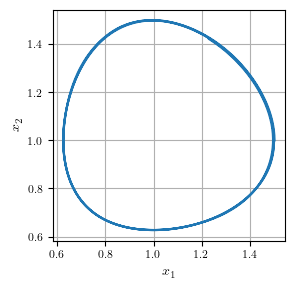

In [ ]:
# Plot phase portrait
plt.figure(figsize=(3, 3))
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
# plt.title("Lotka-Volterra System Phase Portrait")
plt.grid(True)
plt.savefig("p1fig1.pdf", bbox_inches="tight")
plt.show()

### 3.1.2 SINDy with 2nd-Order Polynomials

In [7]:
thresholds = np.array([0.2, 0.19, 0.18, 0.17, 0.16, 0.15])
feature_library = ps.feature_library.PolynomialLibrary(degree=2)
for threshold in thresholds:
    model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_names=["x1", "x2"])
    model.fit(x, t=t)
    print(f"threshold: {threshold}")
    model.print()
    print("")

threshold: 0.2
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.19
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.18
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.17
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.16
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = 0.408 1 + -0.408 x1 + -2.450 x2 + 0.197 x1^2 + 1.998 x1 x2 + 0.216 x2^2

threshold: 0.15
(x1)' = -0.381 1 + 2.374 x1 + 0.427 x2 + -0.182 x1^2 + -1.996 x1 x2 + -0.206 x2^2
(x2)' = 0.408 1 + -0.408 x1 + -2.450 x2 + 0.197 x1^2 + 1.998 x1 x2 + 0.216 x2^2



### 3.1.4 SINDy with 3rd-Order Polynomials

In [8]:
thresholds = np.array([0.2, 0.19, 0.18, 0.17, 0.16, 0.15])
feature_library = ps.feature_library.PolynomialLibrary(degree=3)
for threshold in thresholds:
    model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_names=["x1", "x2"])
    model.fit(x, t=t)
    print(f"threshold: {threshold}")
    model.print()
    print("")

threshold: 0.2
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.19
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.18
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.17
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = -2.002 x2 + 2.002 x1 x2

threshold: 0.16
(x1)' = 2.001 x1 + -2.001 x1 x2
(x2)' = 0.408 1 + -0.408 x1 + -2.450 x2 + 0.197 x1^2 + 1.998 x1 x2 + 0.216 x2^2

threshold: 0.15
(x1)' = -0.381 1 + 2.374 x1 + 0.427 x2 + -0.182 x1^2 + -1.996 x1 x2 + -0.206 x2^2
(x2)' = 0.408 1 + -0.408 x1 + -2.450 x2 + 0.197 x1^2 + 1.998 x1 x2 + 0.216 x2^2



### 3.1.5 SINDy with Noise

In [9]:
np.random.seed(0)
x_noisy = x + 0.01 * np.random.randn(*x.shape)
dxdt_noisy_estimate = np.array([np.gradient(_x, t) for _x in x_noisy.T]).T

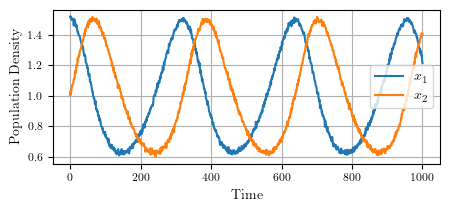

In [ ]:
plt.figure(figsize=(5, 2))
plt.plot(x_noisy)
plt.xlabel("Time")
plt.ylabel("Population Density")
# plt.title("Lotka-Volterra Noisy Trajectory")
plt.legend(("$x_1$", "$x_2$"), loc="right")
plt.grid(True)
plt.savefig("p1fig2.pdf", bbox_inches="tight")
plt.show()

In [11]:
for threshold in thresholds:
    model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold), feature_names=["x1", "x2"])
    model.fit(x_noisy, t=t)
    print(f"threshold: {threshold}")
    model.print()
    print("")

threshold: 0.2
(x1)' = 1.996 x1 + -2.003 x1 x2
(x2)' = -2.013 x2 + 2.015 x1 x2

threshold: 0.19
(x1)' = 1.996 x1 + -2.003 x1 x2
(x2)' = -2.013 x2 + 2.015 x1 x2

threshold: 0.18
(x1)' = 0.106 1 + 1.939 x1 + -0.136 x2 + -0.001 x1^2 + -1.959 x1 x2 + 0.044 x2^2
(x2)' = -2.013 x2 + 2.015 x1 x2

threshold: 0.17
(x1)' = 0.106 1 + 1.939 x1 + -0.136 x2 + -0.001 x1^2 + -1.959 x1 x2 + 0.044 x2^2
(x2)' = -2.013 x2 + 2.015 x1 x2

threshold: 0.16
(x1)' = 0.106 1 + 1.939 x1 + -0.136 x2 + -0.001 x1^2 + -1.959 x1 x2 + 0.044 x2^2
(x2)' = -2.013 x2 + 2.015 x1 x2

threshold: 0.15
(x1)' = 0.106 1 + 1.939 x1 + -0.136 x2 + -0.001 x1^2 + -1.959 x1 x2 + 0.044 x2^2
(x2)' = -2.013 x2 + 2.015 x1 x2

